# Logistic Regression
- toc: true
- branch: master
- badges: true
- comments: true
- author: Thomas Adler
- image: images/logistic.png
- categories: [fastpages, jupyter]

# Aim

The aim of our model is, of course to get a high accuracy score. However, the most important thing is that we do not want to miss non-functioning water points. We would rather have more false negatives (point labelled as non-functioning is actually fine) than false positives (point labelled as functioning is actually not). This will be calculated by the recall score for the 0/negative class. We want it to be as high as possible.

The intuition is that we would rather send an engineer to a functioning water point by mistake than not repair a non-functioning water point because we missed it. Both are costly and not ideal, but the cost to a whole community prevented from accessing water is worse than paying for an engineer for a repair that does not need to be made.

# Random Guess

Our very first "model" or benchmark is the accuracy score we would get if guessed blindly. Since our outcome variable is binary, if we randomly tried to predict each observation, we would get, on average an accuracy score of 50%. Any model close to this blind guess would probably be close to useless (if not worse!)

This 50% accuracy score would happen if we did not have any prior knowledge about the distribution of our outcome variable. However, if we know that the distribution of our outcome variable (in this case 80% are 1s), we could get an accuracy score of 80%, without any kind of computation

# Logistic Regression

In [35]:
# importing relevant packages, functions and constants
%run /Users/thomasadler/Desktop/futuristic-platipus/capstone/notebooks/ta_01_packages_functions.py

# Preparing data

In [36]:
#clean dataset
modelling_df=pd.read_csv(data_filepath + 'master_modelling_df.csv', index_col=0)

#check
modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107184 entries, 0 to 108905
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   lat_deg                   107184 non-null  float64
 1   lon_deg                   107184 non-null  float64
 2   is_functioning            107184 non-null  int64  
 3   distance_to_primary       107184 non-null  float64
 4   distance_to_secondary     107184 non-null  float64
 5   distance_to_tertiary      107184 non-null  float64
 6   distance_to_city          107184 non-null  float64
 7   distance_to_town          107184 non-null  float64
 8   usage_cap                 107184 non-null  float64
 9   is_complex_tech           107184 non-null  int64  
 10  is_installed_after_2006   107184 non-null  int64  
 11  is_public_management      107184 non-null  int64  
 12  crucialness               107184 non-null  float64
 13  perc_hh_head_male         107184 non-null  f

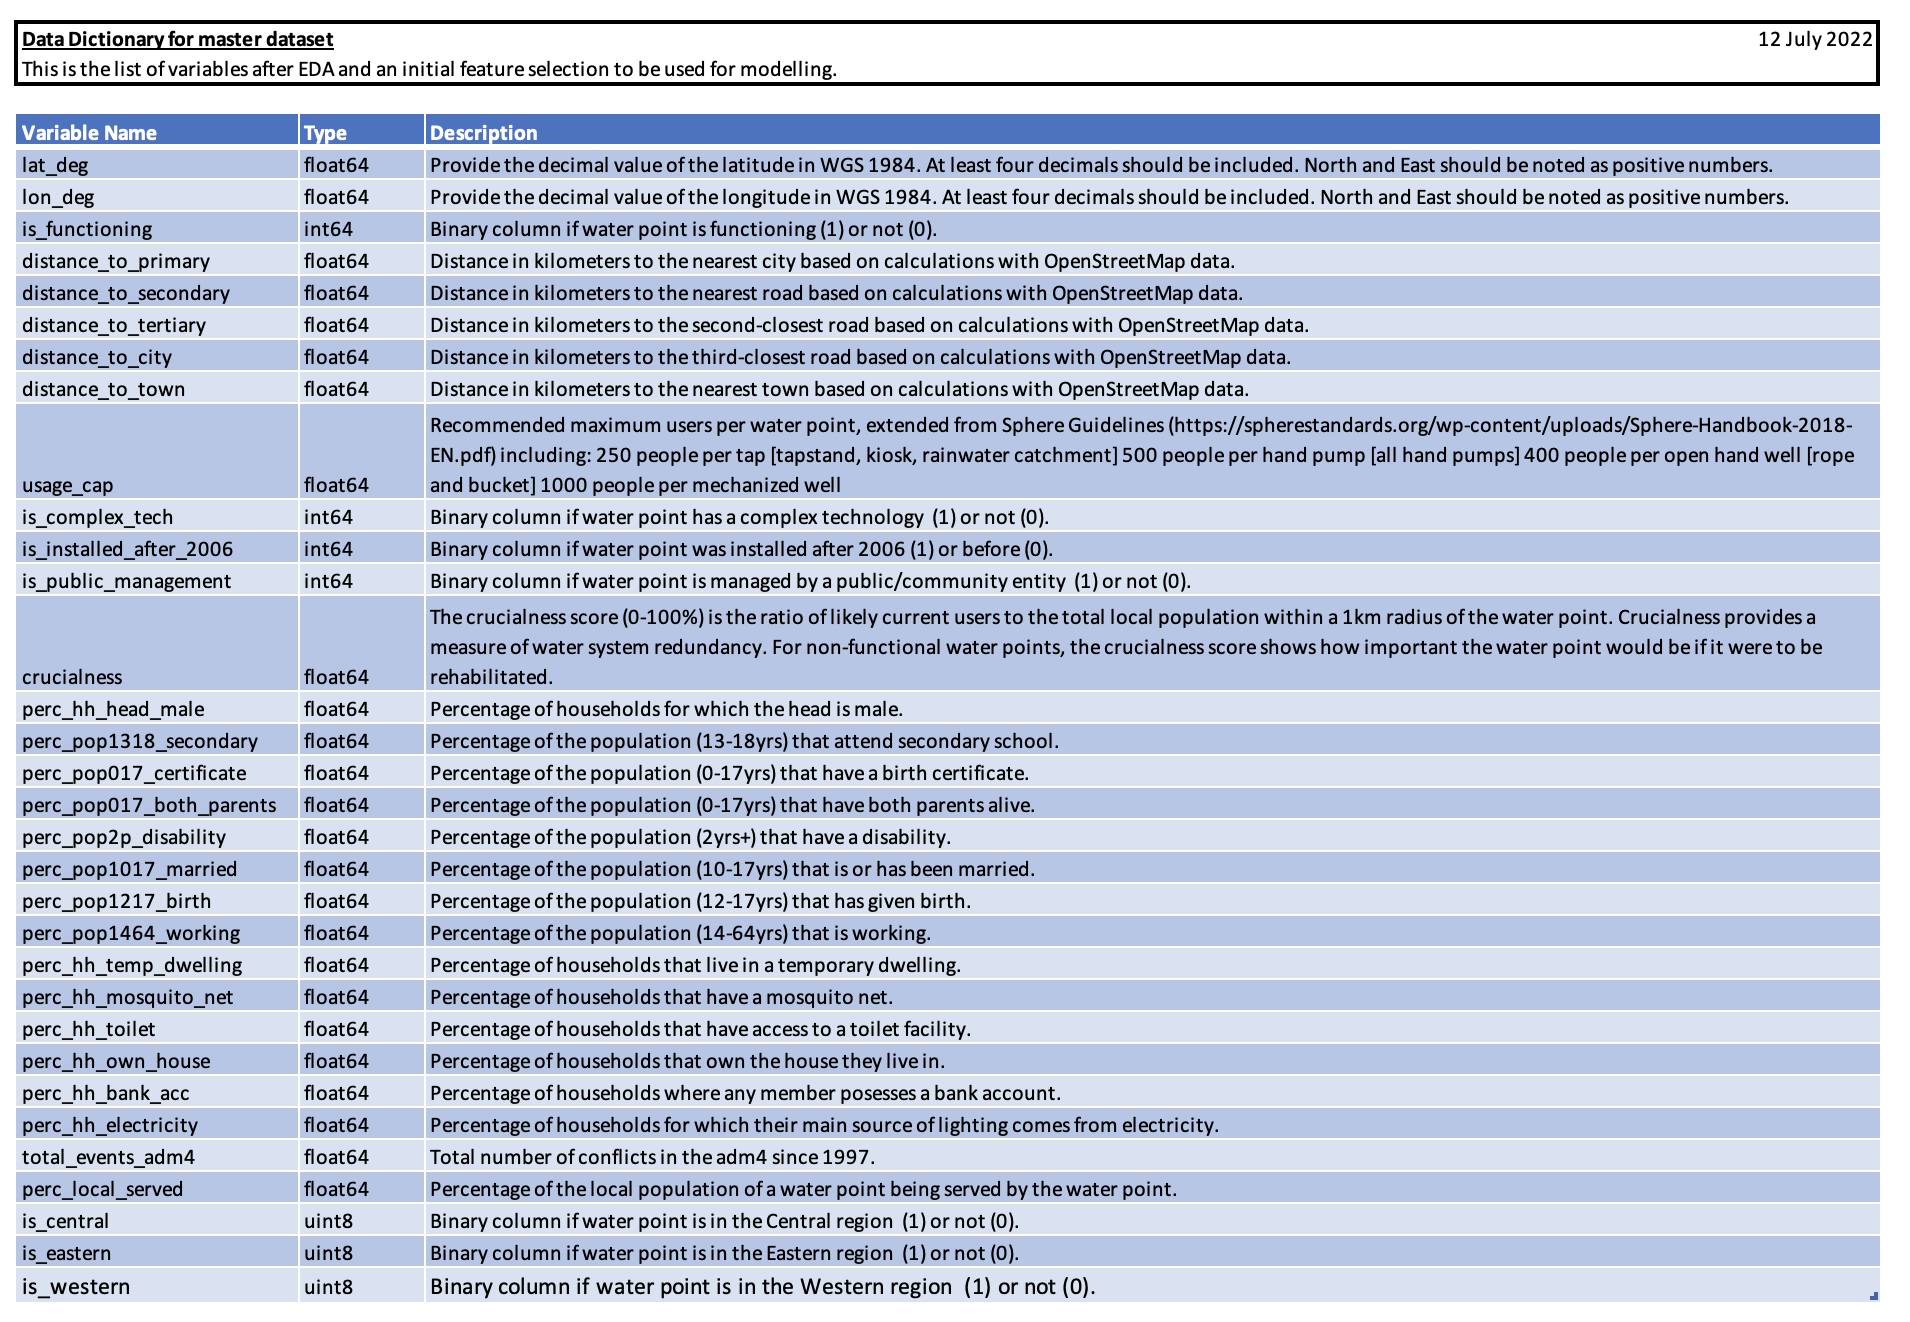

In [37]:
#data dictionary
Image(dictionary_filepath+"5-Modelling-Data-Dictionary.png")

In [38]:
# assigning X (independent) and y (dependent) variables
X =modelling_df.loc[:, modelling_df.columns != 'is_functioning']
y = modelling_df['is_functioning']

#check
print(X.shape)
print(y.shape)

(107184, 31)
(107184,)


Our independent variable (X) should have the same number of rows (107,184) than our dependent variable (y). y should only have one column as it is the outcome variable.

In [39]:
#split train test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_seed)

In [40]:
#check shape of train test set and their distribution
print(f"Test set has {round(y_test.value_counts(normalize=True)[0]*100,1)}% non-functioning water points and {round(y_test.value_counts(normalize=True)[1]*100,1)}% functioning")
print(f"Train set has {round(y_train.value_counts(normalize=True)[0]*100,1)}% non-functioning water points and {round(y_train.value_counts(normalize=True)[1]*100,1)}% functioning")

Test set has 19.2% non-functioning water points and 80.8% functioning
Train set has 19.7% non-functioning water points and 80.3% functioning


Our distribution of the outcome variable might increase the risk of our model recognising and labelling functioning water points much more often and better than non-functioning one. This might be an issue to resolve later on.

# Running baseline model

In [41]:
#time process
start=time.time()

#instantiate and fit
LR_base = LogisticRegression(random_state=rand_seed).fit(X_train, y_train)

end=time.time()

time_fit_base=end-start

print(f"Time to fit the model on the training set is {round(time_fit_base, 3)} seconds")

Time to fit the model on the training set is 0.558 seconds


ROC AUC: 0.6315099570688278
PR AUC: 0.8674406643080401
              precision    recall  f1-score   support

           0       0.34      0.00      0.00     16874
           1       0.80      1.00      0.89     68873

    accuracy                           0.80     85747
   macro avg       0.57      0.50      0.45     85747
weighted avg       0.71      0.80      0.72     85747



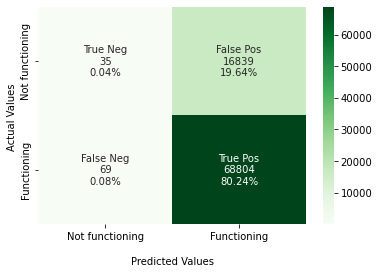

In [42]:
# get classification report for train 
fpr_train_base, tpr_train_base, roc_auc_train_base, precision_train_base_plot, recall_train_base_plot, pr_auc_train_base, time_predict_train_base = print_report(LR_base, X_train, y_train)

#storing accuracy scores
accuracy_train_base, precision_train_base, recall_train_base, f1_train_base = get_scores(LR_base, X_train, y_train)


Our basic logistic regression has a relatively good accuracy score of 80% on the training set. However, this is only because our model is currently labelling nearly all water points as functioning. This is how we end up with a huge False Positive Rate (FPR) of close to 20%. This makes our recall and f1 score for non-functioning water points go down to 0.

ROC AUC: 0.623163643313243
PR AUC: 0.8678263254769776
              precision    recall  f1-score   support

           0       0.23      0.00      0.00      4110
           1       0.81      1.00      0.89     17327

    accuracy                           0.81     21437
   macro avg       0.52      0.50      0.45     21437
weighted avg       0.70      0.81      0.72     21437



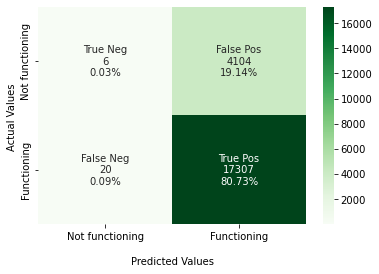

Time to predict the outcome variable for the test set is 0.006 seconds


In [43]:
# get classification report and confusion matrix for test
fpr_test_base, tpr_test_base, roc_auc_test_base, precision_test_base_plot, recall_test_base_plot, pr_auc_test_base, time_predict_test_base = print_report(LR_base, X_test, y_test)

print(f"Time to predict the outcome variable for the test set is {round(time_predict_test_base,3)} seconds")

#storing accuracy scores
accuracy_test_base, precision_test_base, recall_test_base, f1_test_base = get_scores(LR_base, X_test, y_test)

Similarly to the training set, the model predictions for the test set are pretty useless. One could just label all points functioning and end up with the same result, without actually doing a single calculation. As mentioned above, this is due to our sample being unbalanced, where 80% of our water point observations are functioning. As a result, it does not identify any kind of patterns for non-functioning water points.

# Upsampling non-functioning water points

In [44]:
# #resampling dataset
sm = SMOTE(random_state=rand_seed)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

#compre resampled dataset
print(f"Original train set has {round(y_train.value_counts(normalize=True)[0]*100,1)}% non-functioning water points and {round(y_train.value_counts(normalize=True)[1]*100,1)}% functioning")
print(f"Resampled train set has {round(y_train_res.value_counts(normalize=True)[0]*100,1)}% non-functioning water points and {round(y_train_res.value_counts(normalize=True)[1]*100,1)}% functioning")


Original train set has 19.7% non-functioning water points and 80.3% functioning
Resampled train set has 50.0% non-functioning water points and 50.0% functioning


We over-sample the minority class, non-functioning water points, to get an equal distribution of our outcome variable. Note this should be done on the train set and not the test set as we should not tinker with the latter.

# Narrowing down parameters

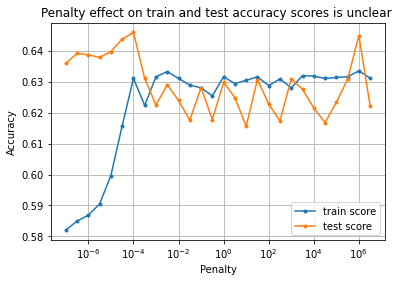

In [45]:
# look at the accuracy of the test score depending on the penalty

# set range of penalties
c_range = [10**i for i in np.arange(-7, 7, 0.5)]
accuracy_scores = pd.DataFrame()

for c in c_range:

    #instantiate and fit
    LR = LogisticRegression(C=c, random_state=rand_seed).fit(
        X_train_res, y_train_res)

    # store accuracy scores
    train_score = LR.score(X_train_res, y_train_res)
    test_score = LR.score(X_test, y_test)

    # append to list
    accuracy_scores = accuracy_scores.append(
        {'Penalty': c, 'Train_score': train_score, 'Test_score': test_score}, ignore_index=True)

# visualise relationship between penalty and accuracy
plt.figure()

plt.plot(accuracy_scores['Penalty'],
         accuracy_scores['Train_score'], label='train score', marker='.')
plt.plot(accuracy_scores['Penalty'],
         accuracy_scores['Test_score'], label='test score', marker='.')

plt.xscale('log')
plt.xlabel('Penalty')
plt.ylabel("Accuracy")

plt.title("Penalty effect on train and test accuracy scores is unclear ")
plt.legend(loc='best')
plt.grid()

plt.show()

There is not a very clear trend between the accuracy scores on the train and test sets and the magnitude of the penalty. The penalty should help with preventing overfitting, keeping these two curves closer to each other. We see that this might be happening after we pass the penalty threshold of $10^-4$. If we had more granular data points, we might see that the curves are much closer to each other more consistently.

# PCA Analysis

Principal Component Analysis (PCA) is a method reduce the dimensions in a dataset, while keeping the accuracy score/performance high. The idea is that it excludes Principal Components which do not explain much of the variance in the dataset.

In [46]:
#fit PCA to train set
pca = PCA(n_components = None).fit(X_train_res)

We fit our PCA to our training set.

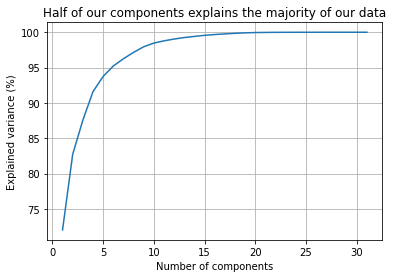

In [47]:
#number of features
components = len(X.columns)

# plot a scree plot
plt.plot(range(1,components+1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")
plt.title("Half of our components explains the majority of our data")
plt.grid()
plt.show()

The scree plot above shows us the percentage of variance explained by each number of principal components. For example, the first principal component explains close to 3/4ths of the variance. As we add more principal components, the marginal improvement in explained variance slowly decreases. We get to around 100% of explained variance at around the 15th principal component (out of 32 principal components, as we have 32 features)

It seems that most of our principal components are important in explaining the variance in our dataset. This is probably due to the thorough feature engineering we did to cut down from more than 70 columns to our current 32. Although we will test whether reducing dimensions through PCA will improves our model accuracy, we do not expect it as all variables seem important in explaining the variance in our data.

# Finding optimal hyperparameters

We run a grid search cross validation through a pipeline to find the optimal hyperparameters for our logistic regression. We choose the default scoring method of accuracy for our grid search. I tried different scoring methods and it did not change anything to the grid search. Since most models were run with the default the first time, we stick to accuracy as the scoring method for our grid search to optimise.

In [48]:
#grid search CV to optimise hyperparameters
c_range = [10**i for i in np.arange(-6, 6, 0.5)]
c_range.insert(0, 0)

# setting up which models/scalers we want to grid search
estimator = [('scaling', StandardScaler()),
('reduce_dim', PCA()),
             ('LR', LogisticRegression(random_state=rand_seed))]

# defining parameters we want to compare
param = {'LR__penalty': ['l1', 'l2'],
'LR__C': c_range,
'reduce_dim__n_components': [0.5, 0.6, 0.7, 0.8, 0.9, None]}

# run cross validation
pipeline_cross_val_grid(estimator, param, X_train_res, y_train_res, X_test, y_test)

The model with the best CV score has the following parameters: {'LR__C': 0.01, 'LR__penalty': 'l2', 'reduce_dim__n_components': None}.
The best model has an accuracy score of 0.8750768092934949 on the test set


The best model here seems to have a much lower accuracy score, but hopefully it scores better on its precision and recall scores for non-functioning water points. Interestingly, the best model does not use PCA to reduce dimensions.

# Running optimised model

In [49]:
# scale the data
X_train_res_scaled, X_test_scaled = scaling(StandardScaler(), X_train_res, X_test)

Note that the scaler should be fitted on the training set and then should be used to transform the training and test set.

In [55]:
#time process
start=time.time()

#instantiate and fit
LR_opt = LogisticRegression(penalty='l2', C=0.01, random_state=rand_seed).fit(X_train_res_scaled, y_train_res)

end=time.time()

time_fit_opt=end-start

print(f"Time to fit the model on the training set is {round(time_fit_opt,3)} seconds")

Time to fit the model on the training set is 0.403 seconds


The time to fit the model with our optimal parameter is similar to the baseline model, around 0.4 seconds.

ROC AUC: 0.7094187724618326
PR AUC: 0.7066881913423855
              precision    recall  f1-score   support

           0       0.65      0.65      0.65     68873
           1       0.65      0.65      0.65     68873

    accuracy                           0.65    137746
   macro avg       0.65      0.65      0.65    137746
weighted avg       0.65      0.65      0.65    137746



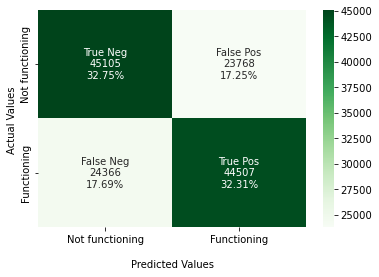

In [56]:
# get classification report for train
fpr_train_opt, tpr_train_opt, roc_auc_train_opt, precision_train_opt_plot, recall_train_opt_plot, pr_auc_train_opt, time_predict_train_opt = print_report(LR_opt, X_train_res_scaled, y_train_res)

#storing accuracy scores
accuracy_train_opt, precision_train_opt, recall_train_opt, f1_train_opt = get_scores(LR_opt, X_train_res_scaled, y_train_res)

The accuracy score for the training set has plummeted from 80 to 65%. However, the precision, recall and f1 scores have all improved dramatically, all of them at the 65% mark.

ROC AUC: 0.6392664388742826
PR AUC: 0.8750596739454459
              precision    recall  f1-score   support

           0       0.27      0.55      0.36      4110
           1       0.86      0.65      0.74     17327

    accuracy                           0.63     21437
   macro avg       0.56      0.60      0.55     21437
weighted avg       0.75      0.63      0.67     21437



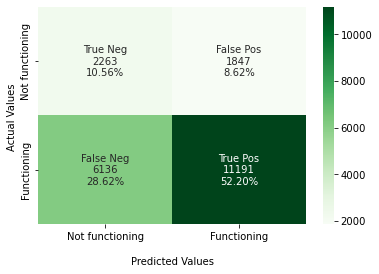

Time to predict the outcome variable for the test set is 0.003 seconds


In [57]:
# get classification report for test
fpr_test_opt, tpr_test_opt, roc_auc_test_opt, precision_test_opt_plot, recall_test_opt_plot, pr_auc_test_opt, time_predict_test_opt = print_report(LR_opt, X_test_scaled, y_test)

print(f"Time to predict the outcome variable for the test set is {round(time_predict_test_opt,3)} seconds")

#storing accuracy scores
accuracy_test_opt, precision_test_opt, recall_test_opt, f1_test_opt = get_scores(LR_opt, X_test_scaled, y_test)

The various accuracy metrics for functioning water points in our optimised model has decreased compared to our baseline model. However, these metrics for non-functioning water points have increased substantially. For example, only 9% of predictions are false positives, comapred to 20% previously. Our false negatives have increased to nearly a third, which is not great. The time to predict the test set has slightly improved from our base model, even though we specified more parameters.

# Comparing results

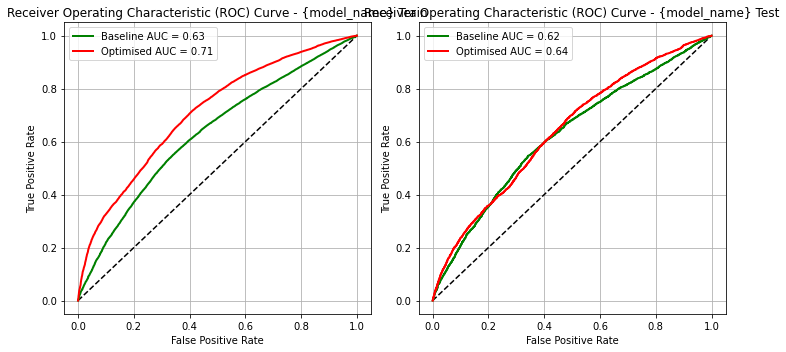

In [53]:
#visualising roc curve
plot_curve_roc('LR', fpr_train_base, tpr_train_base, roc_auc_train_base, fpr_train_opt, tpr_train_opt, roc_auc_train_opt, fpr_test_base,
 tpr_test_base, roc_auc_test_base,  fpr_test_opt, tpr_test_opt, roc_auc_test_opt)

The ROC curve shows us the performance of our models at different thresholds. Our optimised model performs much better than our baseline model on our training set. Our resampling and parameter optimization seems to have made the model better at identifying trends in the data. On the other hand, this improvement in accuracy is much smaller in our test set, although still there.

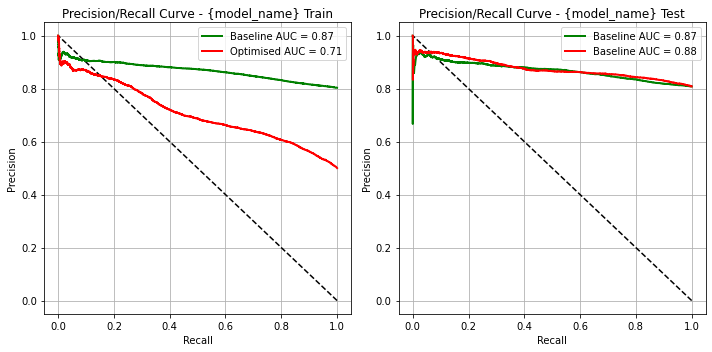

In [58]:
#visualising precision/recall curve
plot_curve_prec_recall('LR', recall_train_base_plot, precision_train_base_plot, pr_auc_train_base, recall_train_opt_plot, precision_train_opt_plot, pr_auc_train_opt,
 recall_test_base_plot, precision_test_base_plot,  pr_auc_test_base, recall_test_opt_plot, precision_test_opt_plot, pr_auc_test_opt)

The precision/recall curve is not a very useful visualisation so we will refrain from visualising these plots in the future.

# Visualising feature importance

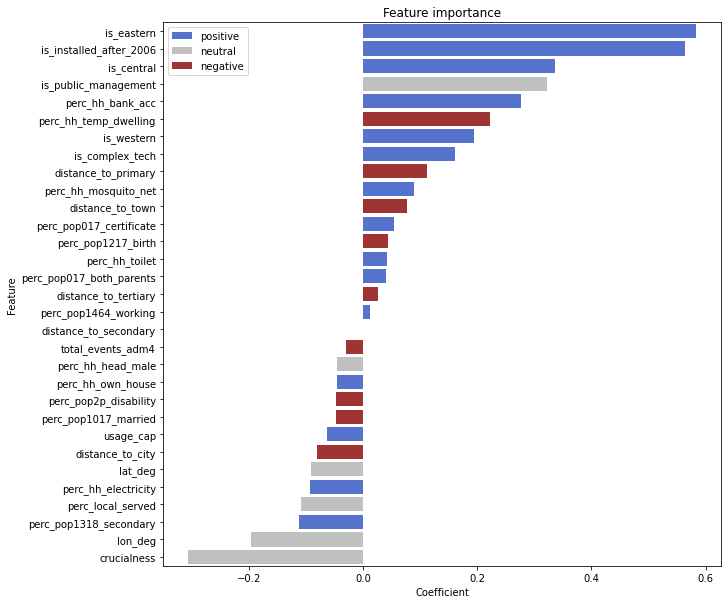

In [59]:
#visualising coefficient importance
coeff_bar_chart(LR_opt.coef_, X.columns, t=True)

The colors in the bar chart below represent the initial hypotheses that we have made. Positive (blue) means that we expect there to be a positive relationship between that variable and the functionality of a water point. Grey is neutral, as we believe the relationship might be more complex and red is a negative relationship. This enables us to assess whether our hypotheses has been validated or not.

Water points which were installed after 2006 have a much higher probability of being functioning. Not being in the Northern region and being in one where the bank account ownership rate is high also increases that probability. Being publicly managed and being of complex technology is also a sign of a functioning water point.

Interestingly, violent events and conflicts are low predictors of water point functionality. This might suggest that demographic and regional factors are the main drivers, and violence might just also be a result of these regional differences.

Health and prosperity metrics have little explanatory power in the functioning of a water point.

Finally, points which serve a large percentage of their local population and those which are very crucial to its neighboring communities increases the probability of that water point not functioning. We can imagine that overuse might be a major cause of this.

Regarding our hypotheses, we were especially wrong with the proportion of people in temporary dwelling. It seems to be associated with functioning water points. We also thought that higher rates of secondary school enrollment would be positively correlated with functionality, however, in this model, we find the opposite.

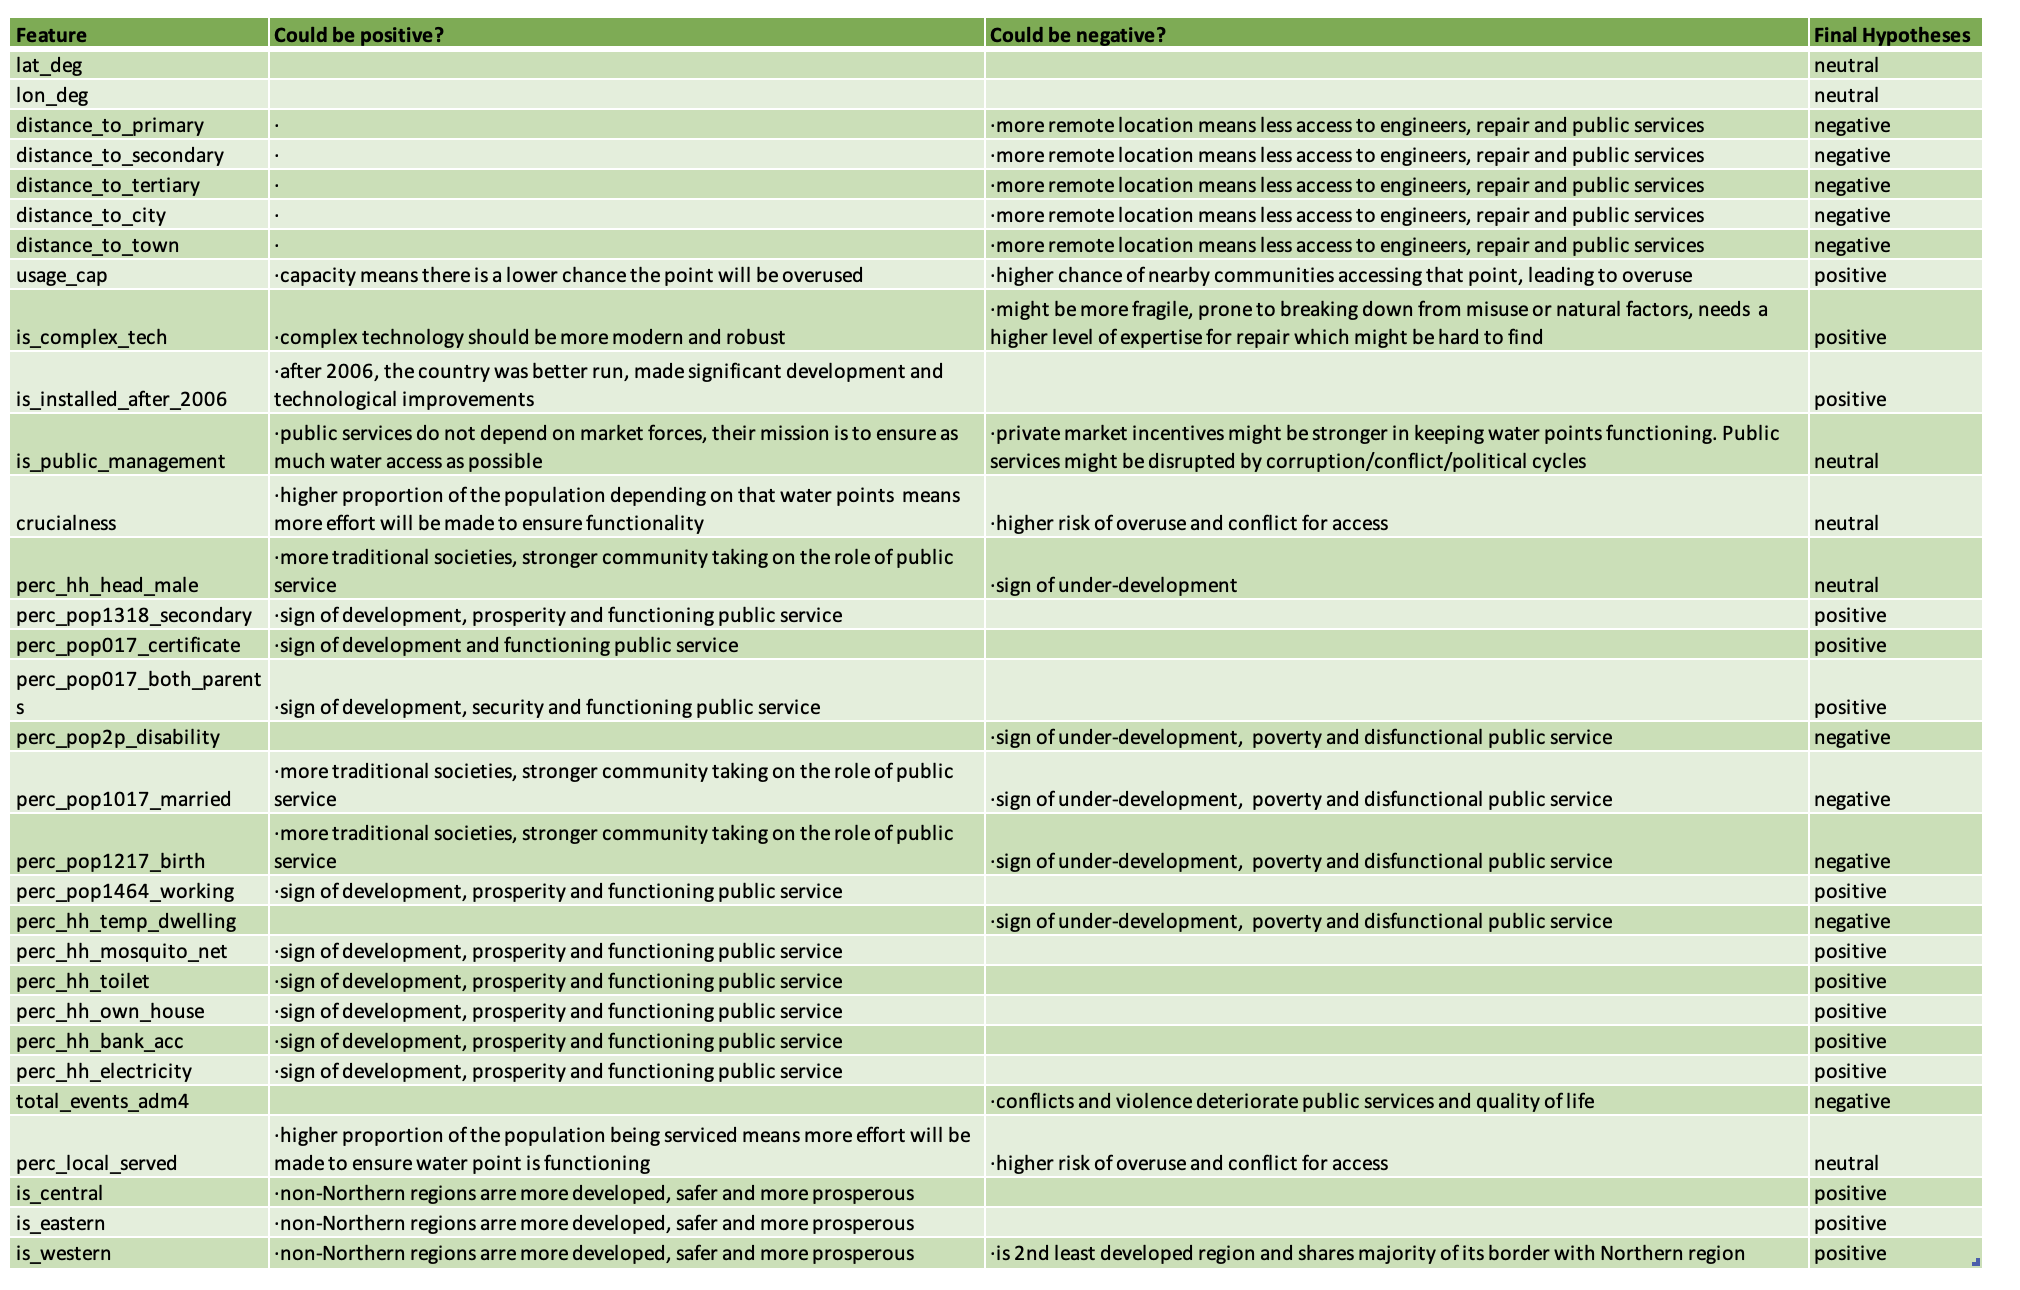

In [60]:
#hypotheses table
Image(dictionary_filepath+"6-Hypotheses.png")

# Exporting

In [61]:
#export model results
joblib.dump(LR_opt, model_filepath+'logistic_regression_model.sav')

['/Users/thomasadler/Desktop/futuristic-platipus/models/logistic_regression_model.sav']

In [62]:
#export best model in dataframe
d = {'Model':['Logistic Regression'], 'Parameters':['Penalty=l2, C=0.01, Standard Scaler'], 'Accuracy Train': [accuracy_train_opt],\
    'Precision Train': [precision_train_opt], 'Recall Train': [recall_train_opt], 'F1 Train': [f1_train_opt], 'ROC AUC Train':[roc_auc_train_opt],\
        'Accuracy Test': accuracy_test_opt, 'Precision Test': [precision_test_opt], 'Recall Test': [recall_test_opt], 'F1 Test': [f1_test_opt],\
            'ROC AUC Test':[roc_auc_test_opt], 'Time Fit': time_fit_opt,\
                'Time Predict': time_predict_test_opt, "Precision Non-functioning Test": 0.27, "Recall Non-functioning Test": 0.55,\
                    "F1 Non-functioning Test": 0.36,"Precision Functioning Test": 0.86, "Recall Functioning Test": 0.65,"F1 Functioning Test": 0.74}

#to dataframe
best_model_result_df=pd.DataFrame(data=d)

#check
best_model_result_df

,Model,Parameters,Accuracy Train,Precision Train,Recall Train,F1 Train,ROC AUC Train,Accuracy Test,Precision Test,Recall Test,F1 Test,ROC AUC Test,Time Fit,Time Predict,Precision Non-functioning Test,Recall Non-functioning Test,F1 Non-functioning Test,Precision Functioning Test,Recall Functioning Test,F1 Functioning Test
0,Logistic Regression,"Penalty=l2, C=0.01, Standard Scaler",0.65056,0.650571,0.65056,0.650553,0.709419,0.627606,0.74543,0.627606,0.665148,0.639266,0.403007,0.003307,0.27,0.55,0.36,0.86,0.65,0.74


In [63]:
#export new dataset
best_model_result_df.to_csv(model_filepath + 'logistic_regression_model.csv')

In [64]:
#list of metrics we want to visualise
metrics=[fpr_train_opt, tpr_train_opt, fpr_test_opt, tpr_test_opt]
metrics_name=['fpr_train_opt', 'tpr_train_opt', 'fpr_test_opt', 'tpr_test_opt']

#save numpy arrays for model comparison
for metric, metric_name in zip(metrics, metrics_name):
    np.save(model_filepath+f'logistic_regression_{metric_name}', metric)